# Part 1. Data Processing:

## Dataset info

#### The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. 

#### The classification goal is to predict if the client will subscribe a term deposit (variable y).

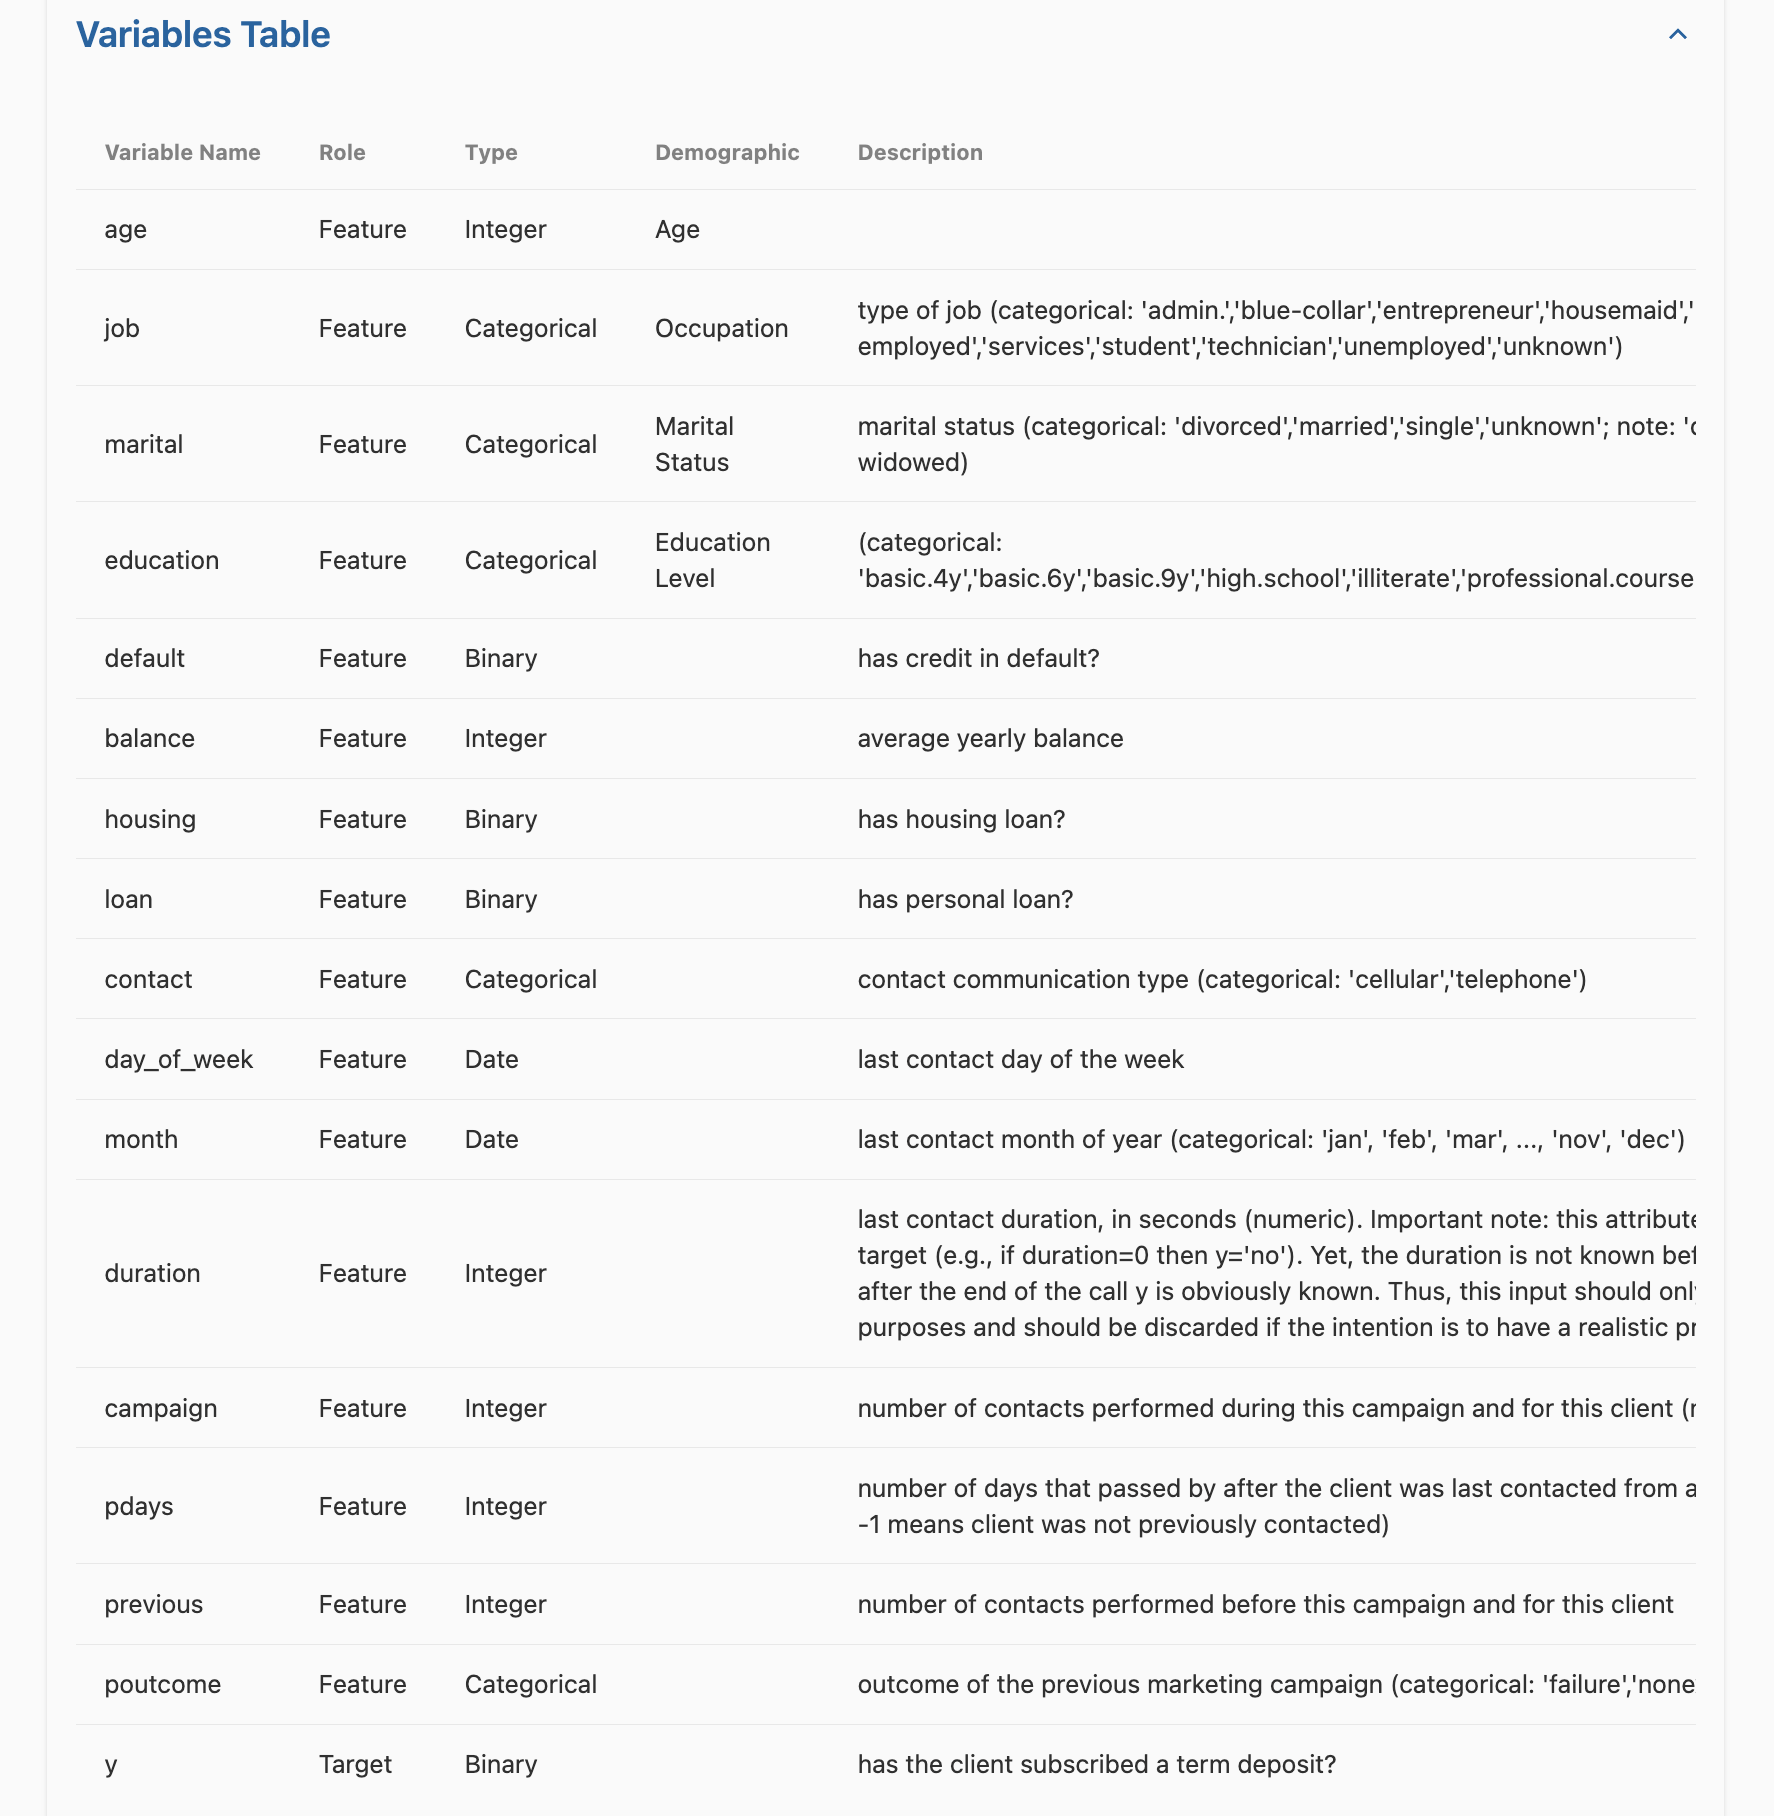

In [5]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
import numpy as np

In [6]:
data = pd.read_csv('bank-additional-full.csv', delimiter=';')

# 1. Explore the Dataset:

In [10]:
data.head(30)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [12]:
data.shape

(41188, 21)

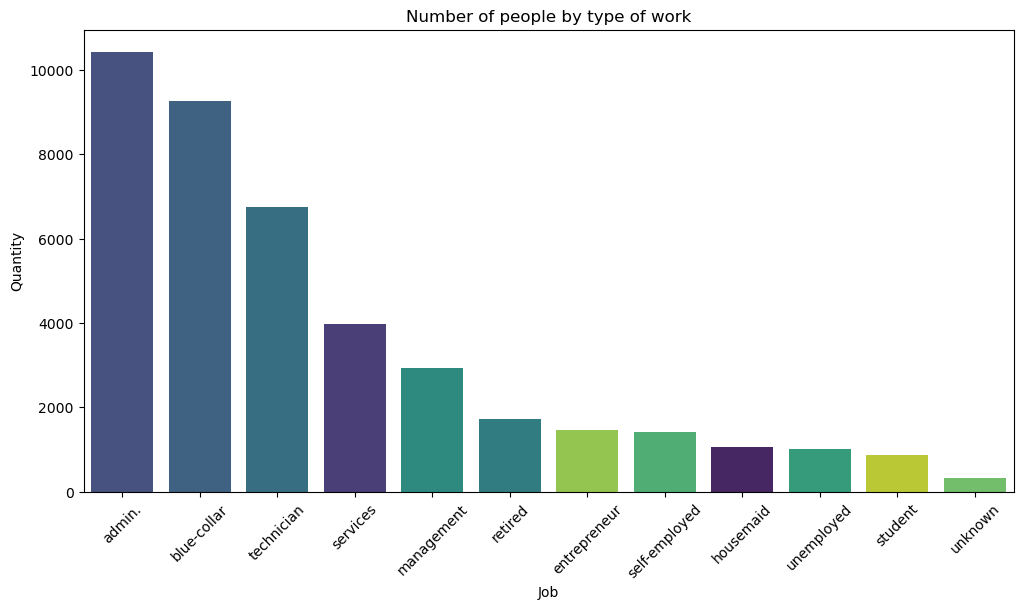

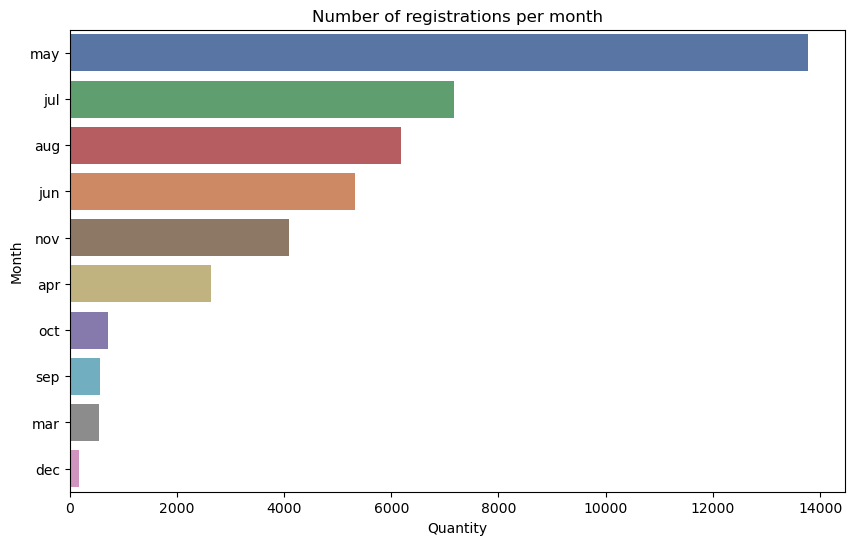

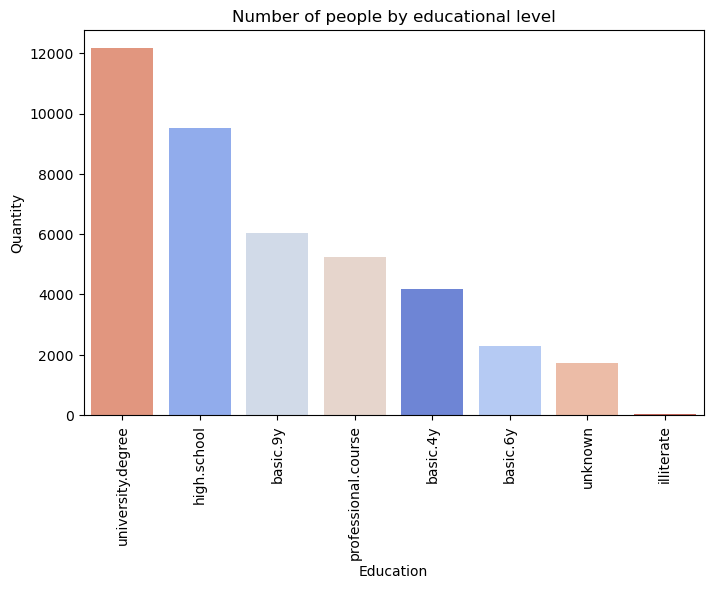

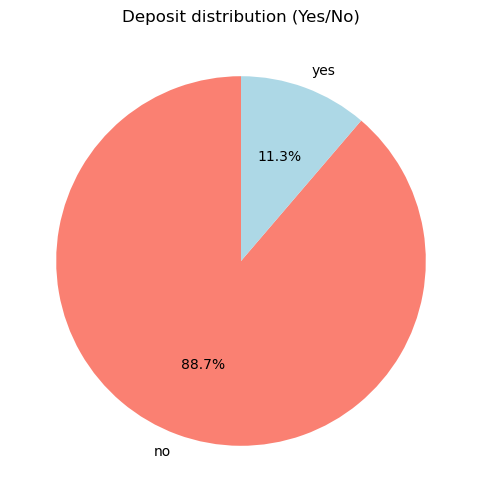

In [41]:
#Overall info for some categorical data

#Job column
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x="job", hue="job", legend=False, palette="viridis", order=data["job"].value_counts().index)
plt.xticks(rotation=45)
plt.title("Number of people by type of work")
plt.xlabel("Job")
plt.ylabel("Quantity")
plt.show()

#Month column
plt.figure(figsize=(10, 6))
sns.countplot(data=data, y="month", hue="month", legend=False, palette="deep", order=data["month"].value_counts().index)
plt.title("Number of registrations per month")
plt.xlabel("Quantity")
plt.ylabel("Month")
plt.show()


#Education column
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x="education", hue="education", legend=False, palette="coolwarm", order=data["education"].value_counts().index)
plt.xticks(rotation=90)
plt.title("Number of people by educational level")
plt.xlabel("Education")
plt.ylabel("Quantity")
plt.show()

#Deposit column
plt.figure(figsize=(6, 6))
data["y"].value_counts().plot(kind="pie", autopct="%1.1f%%", colors=["salmon", "lightblue"], startangle=90)
plt.title("Deposit distribution (Yes/No)")
plt.ylabel("")  # remove Y
plt.show()

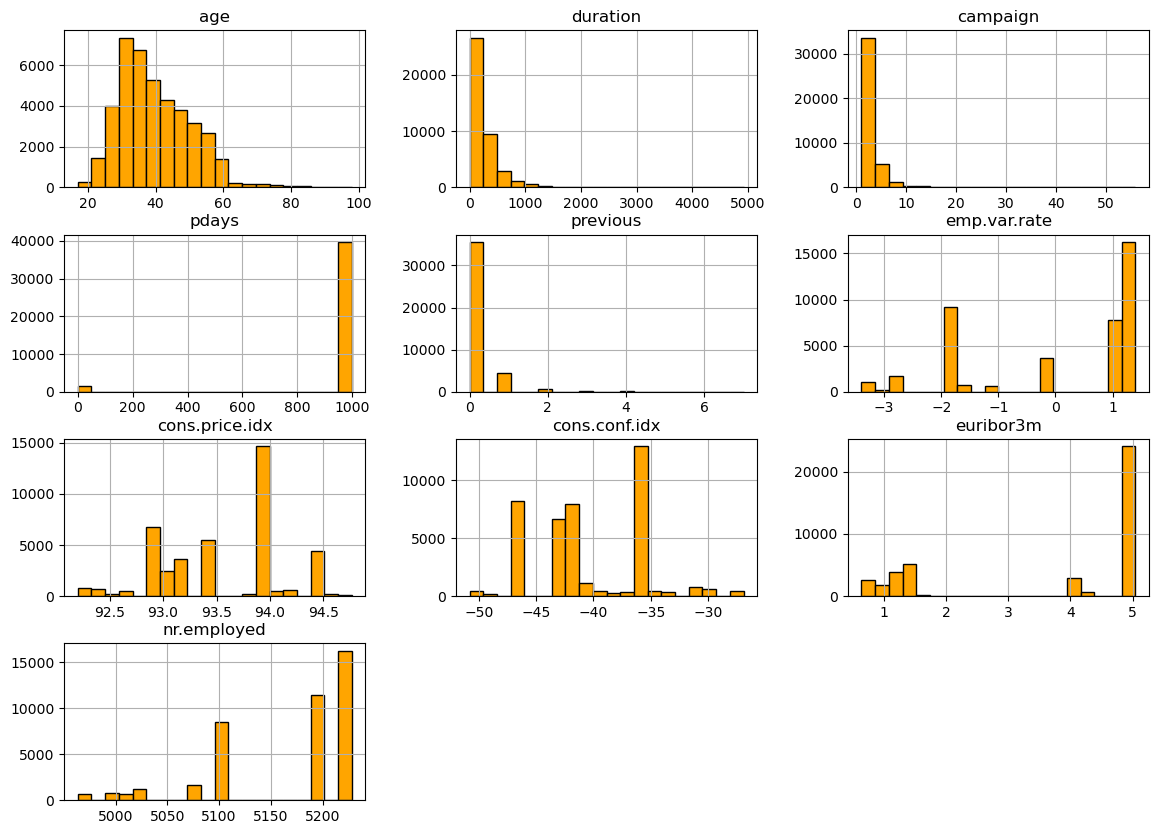

In [35]:
# Overall for numerical data
data.hist(figsize=(14, 10), bins=20, edgecolor='black', color='orange')
plt.show()

# 2. Handle Missing Data:

In [17]:
# Check for missing values
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

## Observation : There is no missing value.

# 3. Handle Outliers :

In [ ]:
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns

# Create boxplots for numerical features
plt.figure(figsize=(12, 6))
data[numerical_cols].boxplot(rot=45)  # Rotate labels for better readability
plt.title("Boxplot of Numerical Features")
plt.show()

## Observation : There are some outliers in duration, pdays, but since the research paper does not explicitly mention removing outliers in the data preprocessing steps and we are reproducing the paper's methodology so it is better to keep the outliers.

# 3. Encoding Categorical Features:

## 3-1. Convert 'yes'/'no' to 0/1 : 'y'.

In [ ]:
# Define binary columns
binary_columns = ['y']

# Replace values: 'no' → 0, 'yes' → 1
data[binary_columns] = data[binary_columns].replace({'no': 0, 'yes': 1})

# Ensure correct data types
data[binary_columns] = data[binary_columns].infer_objects(copy=False)

In [ ]:
data.head()

## 3-2. LabelEncoding : 'job', 'marital', 'default', 'housing', 'loan', 'month', 'contact', 'day_of_week', 'poutcome'

In [ ]:
# Identify object columns
categorical_columns = data.select_dtypes(include=['object']).columns
categorical_columns

In [ ]:
# List the categorical columns to apply one-hot encoding to
categorical_columns = ['job', 'marital', 'default', 'housing', 'loan', 'month', 'contact', 'day_of_week', 'poutcome']

le = LabelEncoder()

for col in categorical_columns:
    data[col] = le.fit_transform(data[col])

data.head()

## 3-3. OrdinalEncoding : 'Education'

In [ ]:
data['education'].unique()

In [ ]:
encoder = OrdinalEncoder(categories=[['university.degree','professional.course','high.school', 'basic.9y', 'basic.6y', 'basic.4y', 'illiterate', 'unknown']])

data['education'] = encoder.fit_transform(data[['education']])

# As the encoding its a float, I'll change it to int 
data['education'] = data['education'].astype(int)

data.head()

# 4. Data Splitting :

In [ ]:
X = data.drop('y', axis=1)
y = data['y']

In [ ]:
# Split the data into training and testing sets (67% train, 33% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=46)

# 5. Feature Scaling :

## The research paper does not explicitly mention which scaling method they used, but StandardScaler is a good choice for this dataset because:
### ✅ Preserves Shape → Keeps the original distribution (except for mean and variance).
### ✅ Handles Normally Distributed Data Well → If the feature follows a normal distribution, it works best.
### ✅ Used in Many Machine Learning Models → Models like Logistic Regression, SVM, and KNN perform better with standardized data.

In [ ]:
scaler = StandardScaler()

# Fit and transform the training data, and transform the test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [ ]:
X_train.head(10)

# Part 2. Steps reproduced from the paper :

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

In [ ]:
Y_lr_pred = lr.predict(X_test)

In [ ]:
print(f'Accuracy of Logistic Regression: {lr.score(X_test, y_test): .2f}')

In [ ]:
conf_lr = confusion_matrix(y_test, Y_lr_pred)
conf_lr

In [ ]:
target_names = ['yes', 'no']
print(classification_report(y_test, Y_lr_pred, target_names=target_names))

### The model performs well for the majority class ("yes") but struggles with the minority class ("no"), as shown by the low recall (43%). This suggests class imbalance, where many "no" instances are misclassified.

# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt_clr = DecisionTreeClassifier()
dt_clr.fit(X_train, y_train)

In [ ]:
Y_dt_pred = dt_clr.predict(X_test)
print(f'Accuracy of Decision Tree: {dt_clr.score(X_test, y_test): .2f}')

In [ ]:
conf_dt = confusion_matrix(y_test, Y_dt_pred)
conf_dt

In [ ]:
print(classification_report(y_test, Y_dt_pred, target_names=target_names))

### The model performs well for predicting "yes" but struggles with "no" due to class imbalance. While accuracy is high (89%), the low precision (50%) and recall (53%) for "no" indicate many misclassifications. Improving class balance or adjusting thresholds could enhance minority class prediction.

In [ ]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(dt_clr, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns,class_names=['yes','no'], max_depth=3)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('bank_marketing.png')
Image(graph.create_png())

### This decision tree classifies whether a customer will respond positively ("yes") based on various features like employment rate (`nr.employed`), duration of contact (`duration`), and past interactions (`pdays`, `campaign`). The tree splits at different thresholds to maximize class separation, with the Gini index indicating impurity at each node. Orange nodes indicate a higher likelihood of "yes" responses, while blue nodes lean towards "no".

## 3. SVM

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc = SVC(probability=True)
svc.fit(X_train, y_train)

In [ ]:
Y_svc_pred = svc.predict(X_test)

In [ ]:
print(f'Accuracy of SVM: {svc.score(X_test, y_test): .2f}')

In [ ]:
print(classification_report(y_test, Y_svc_pred, target_names=target_names))

In [ ]:
conf_svc = confusion_matrix(y_test, Y_svc_pred)
conf_svc

# Part 3. Contributions:

# 1. KNN :

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [ ]:
error_rates = []
k_values = range(1, 31)
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    error = 1 - accuracy_score(y_test, y_pred)
    error_rates.append(error)

In [ ]:
plt.figure(figsize=(20, 5))
plt.plot(k_values, error_rates, marker='o', linestyle='dashed', color='b', markersize=8)
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Error Rate')
plt.title('Elbow Method to Find Optimal k')
plt.xticks(np.arange(1, 31))
plt.grid(True)
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score
from statistics import mean

In [ ]:
knn_27 = KNeighborsClassifier(n_neighbors=27)
score_k_27 = cross_val_score(knn_27, X_train, y_train, cv=5)
avg_score_k_27 = mean(score_k_27)
print(f"Average score for 27 neighbors: {avg_score_k_27}")

In [ ]:
knn_27.fit(X_train, y_train)
Y_knn_pred = knn_27.predict(X_test)

In [ ]:
print(f'Accuracy of KNN: {knn_27.score(X_test, y_test): .2f}')

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
target_names = ['No', 'Yes']

In [ ]:
print(classification_report(y_test, Y_knn_pred, target_names=target_names))

In [ ]:
conf_knn = confusion_matrix(y_test, Y_knn_pred)
conf_knn

## Observation : Accuracy of KNN is 0.90.

# 2. Random Forest :

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

In [ ]:
Y_rf_pred = rf.predict(X_test)

In [ ]:
print(f'Accuracy of Random Forest: {rf.score(X_test, y_test): .2f}')

In [ ]:
print(classification_report(y_test, Y_rf_pred, target_names=target_names))

In [ ]:
conf_rf = confusion_matrix(y_test, Y_rf_pred)
conf_rf

## Observation : Accuracy of Random Forest is 0.91.

# 3. XGBoost

In [ ]:
!pip install xgboost

In [ ]:
import xgboost as xgb

In [ ]:
xg_train = xgb.DMatrix(X_train, y_train)
xg_test = xgb.DMatrix(X_test, y_test)

In [ ]:
xgb_clf = xgb.XGBClassifier(eval_metric='auc') #auc is used for classification
xgb_clf.fit(X_train, y_train)

In [ ]:
Y_xgb_pred = xgb_clf.predict(X_test)
Y_xgb_pred

In [ ]:
print(f'Accuracy of XGBoost: {xgb_clf.score(X_test, y_test): .2f}')

In [ ]:
print(classification_report(y_test, Y_xgb_pred, target_names=target_names))

In [ ]:
print(confusion_matrix(y_test, Y_xgb_pred))

# AUC-ROC Curve

In [ ]:
from sklearn.metrics import roc_curve, auc

In [ ]:
Y_lr_probs = lr.predict_proba(X_test)[:, 1]
Y_knn_13_probs = knn_13.predict_proba(X_test)[:, 1]
Y_dt_probs = dt_clr.predict_proba(X_test)[:, 1]
Y_svm_probs = svc.predict_proba(X_test)[:, 1]
Y_rf_probs = rf.predict_proba(X_test)[:, 1]
Y_xgb_pred_probs = xgb_clf.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC for all the models
fpr_lr, tpr_lr, _ = roc_curve(y_test, Y_lr_probs)
auc_lr = auc(fpr_lr, tpr_lr)

fpr_knn, tpr_knn, _ = roc_curve(y_test, Y_knn_13_probs)
auc_knn = auc(fpr_knn, tpr_knn)

fpr_dt, tpr_dt, _ = roc_curve(y_test, Y_dt_probs)
auc_dt = auc(fpr_dt, tpr_dt)

fpr_svm, tpr_svm, _ = roc_curve(y_test, Y_svm_probs)
auc_svm = auc(fpr_svm, tpr_svm)

fpr_rf, tpr_rf, _ = roc_curve(y_test, Y_rf_probs)
auc_rf = auc(fpr_rf, tpr_rf)

fpr_xgb, tpr_xgb, _ = roc_curve(y_test, Y_xgb_pred_probs)
auc_xgb = auc(fpr_xgb, tpr_xgb)

# Plot both ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, color='blue', label=f'Logistic Regression (AUC = {auc_lr:.2f})')
plt.plot(fpr_knn, tpr_knn, color='red', linestyle='dashed', label=f'KNN (k=26) (AUC = {auc_knn:.2f})')
plt.plot(fpr_dt, tpr_dt, color='green', linestyle='dashdot', label=f'Decision Tree (AUC = {auc_dt:.2f})')
plt.plot(fpr_svm, tpr_svm, color='orange', linestyle='dashdot', label=f'Support Vector Machine(SVM) (AUC = {auc_svm:.2f})')
plt.plot(fpr_rf, tpr_rf, color='yellow', linestyle='dashed', label=f'Random Forest (AUC = {auc_rf:.2f})')
plt.plot(fpr_xgb, tpr_xgb, color='purple', linestyle='dashed', label=f'XGBoost (AUC = {auc_xgb:.2f})')

# Random guess line
plt.plot([0, 1], [0, 1], color='black', linestyle='dotted', label='Random Guess')

# Labels and Title
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve Comparison for all the classification models")
plt.legend()
plt.grid(True)
plt.show()

# Part. 4 Optimize : SMOTE

In [ ]:
counts = data.y.value_counts()
total = counts.sum()
graf = sns.barplot(x=counts.index, y=counts.values / total * 100)
for i, v in enumerate(counts.values):
    plt.text(i, (v / total * 100) + 1, f"{(v / total * 100):.2f}%", ha='center')
plt.ylabel("Percentage")
plt.xlabel("y")
plt.title("Distribution of y in Percentage")
plt.show()

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
y.value_counts()

In [ ]:
smote = SMOTE(sampling_strategy='minority')
X_resampled, y_resampled = smote.fit_resample(X, y)

In [ ]:
X.shape

In [ ]:
y.value_counts()

In [ ]:
X.head()

In [ ]:
# split train and test data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.33, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## 1. Logistic Regression

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

In [ ]:
Y_lr_pred = lr.predict(X_test)

In [ ]:
print(f'Accuracy of Logistic Regression: {lr.score(X_test, y_test): .2f}')

In [ ]:
conf_lr = confusion_matrix(y_test, Y_lr_pred)
conf_lr

In [ ]:
print(classification_report(y_test, Y_lr_pred, target_names=target_names))

## 2. Decision Tree

In [ ]:
dt_clr = DecisionTreeClassifier()
dt_clr.fit(X_train, y_train)

In [ ]:
Y_dt_pred = dt_clr.predict(X_test)
print(f'Accuracy of Decision Tree: {dt_clr.score(X_test, y_test): .2f}')

In [ ]:
conf_dt = confusion_matrix(y_test, Y_dt_pred)
conf_dt

In [ ]:
print(classification_report(y_test, Y_dt_pred, target_names=target_names))

In [ ]:
dot_data = StringIO()
export_graphviz(dt_clr, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns,class_names=['yes','no'], max_depth=3)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('bank_marketing_SMOTE.png')
Image(graph.create_png())

# 3. SVM

In [ ]:
svc = SVC(probability=True)
svc.fit(X_train, y_train)

In [ ]:
Y_svc_pred = svc.predict(X_test)

In [ ]:
print(classification_report(y_test, Y_svc_pred, target_names=target_names))

In [ ]:
conf_svc = confusion_matrix(y_test, Y_svc_pred)
conf_svc

## 4. KNN

In [ ]:
error_rates = []
k_values = range(1, 31)
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    Y_pred = knn.predict(X_test)
    error = 1 - accuracy_score(y_test, Y_pred)
    error_rates.append(error)

In [ ]:
plt.figure(figsize=(20, 5))
plt.plot(k_values, error_rates, marker='o', linestyle='dashed', color='b', markersize=8)
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Error Rate')
plt.title('Elbow Method to Find Optimal k')
plt.xticks(np.arange(1, 31))
plt.grid(True)
plt.show()

In [ ]:
knn_1 = KNeighborsClassifier(n_neighbors=1)

score_k_1 = cross_val_score(knn_1, X_train, y_train, cv=5)

avg_score_k_1 = mean(score_k_1)

print(f"Average score for 1 neighbors: {avg_score_k_1}")

In [ ]:
knn_1.fit(X_train, y_train)
Y_knn_pred = knn_1.predict(X_test)

In [ ]:
print(f'Accuracy of KNN: {knn_1.score(X_test, y_test): .2f}')

In [ ]:
print(classification_report(y_test, Y_knn_pred, target_names=target_names))

In [ ]:
conf_knn = confusion_matrix(y_test, Y_knn_pred)
conf_knn

## 5. Random Forest

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

In [ ]:
Y_rf_pred = rf.predict(X_test)

In [ ]:
print(f'Accuracy of Random Forest: {rf.score(X_test, y_test): .2f}')

In [ ]:
print(classification_report(y_test, Y_rf_pred, target_names=target_names))

In [ ]:
conf_rf = confusion_matrix(y_test, Y_rf_pred)
conf_rf

## 6. XGBoost

In [ ]:
xg_train = xgb.DMatrix(X_train, y_train)
xg_test = xgb.DMatrix(X_test, y_test)

In [ ]:
xgb_clf = xgb.XGBClassifier(eval_metric='auc') #auc is used for classification
xgb_clf.fit(X_train, y_train)

In [ ]:
Y_xgb_pred = xgb_clf.predict(X_test)

In [ ]:
print(f'Accuracy of XGBoost: {xgb_clf.score(X_test, y_test): .2f}')

In [ ]:
print(classification_report(y_test, Y_xgb_pred, target_names=target_names))

In [ ]:
print(confusion_matrix(y_test, Y_xgb_pred))

# AUC-ROC curve after SMOTE

In [ ]:
Y_lr_probs = lr.predict_proba(X_test)[:, 1]
Y_knn_1_probs = knn_1.predict_proba(X_test)[:, 1]
Y_dt_probs = dt_clr.predict_proba(X_test)[:, 1]
Y_svm_probs = svc.predict_proba(X_test)[:, 1]
Y_rf_probs = rf.predict_proba(X_test)[:, 1]
Y_xgb_pred_probs = xgb_clf.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC for all the models
fpr_lr, tpr_lr, _ = roc_curve(y_test, Y_lr_probs)
auc_lr = auc(fpr_lr, tpr_lr)

fpr_knn, tpr_knn, _ = roc_curve(y_test, Y_knn_1_probs)
auc_knn = auc(fpr_knn, tpr_knn)

fpr_dt, tpr_dt, _ = roc_curve(y_test, Y_dt_probs)
auc_dt = auc(fpr_dt, tpr_dt)

fpr_svm, tpr_svm, _ = roc_curve(y_test, Y_svm_probs)
auc_svm = auc(fpr_svm, tpr_svm)

fpr_rf, tpr_rf, _ = roc_curve(y_test, Y_rf_probs)
auc_rf = auc(fpr_rf, tpr_rf)

fpr_xgb, tpr_xgb, _ = roc_curve(y_test, Y_xgb_pred_probs)
auc_xgb = auc(fpr_xgb, tpr_xgb)

# Plot both ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, color='blue', label=f'Logistic Regression (AUC = {auc_lr:.2f})')
plt.plot(fpr_knn, tpr_knn, color='red', linestyle='dashed', label=f'KNN (k=1) (AUC = {auc_knn:.2f})')
plt.plot(fpr_dt, tpr_dt, color='green', linestyle='dashdot', label=f'Decision Tree (AUC = {auc_dt:.2f})')
plt.plot(fpr_svm, tpr_svm, color='orange', linestyle='dashdot', label=f'Support Vector Machine(SVM) (AUC = {auc_svm:.2f})')
plt.plot(fpr_rf, tpr_rf, color='yellow', linestyle='dashed', label=f'Random Forest (AUC = {auc_rf:.2f})')
plt.plot(fpr_xgb, tpr_xgb, color='purple', linestyle='dashed', label=f'XGBoost (AUC = {auc_xgb:.2f})')

# Random guess line
plt.plot([0, 1], [0, 1], color='black', linestyle='dotted', label='Random Guess')

# Labels and Title
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve Comparison for all the classification models after SMOTE")
plt.legend()
plt.grid(True)
plt.show()